In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import plotly.express as px
import plotly.graph_objects as go


df = pd.read_csv('/content/data_jobs.csv')

df.info()

# No missing values present in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
# To check the size of the initial data set.

df.shape

(9355, 12)

In [10]:
# To show the first 5 rows of the dataset.

df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [279]:
# @title Work Year

work_year_counts = df['work_year'].value_counts().reset_index()
work_year_counts.columns = ['work_year', 'count']


fig = px.bar(work_year_counts,
             x='work_year',
             y='count',
             color = 'work_year',
             labels={'work_year': 'Work Year', 'count': 'Count'},
             title='<i>Distribution of Entries by Work Year<i>')

fig.update_xaxes(dtick=1)

fig.update_layout(showlegend=False, width=800, height=600)
fig.show()


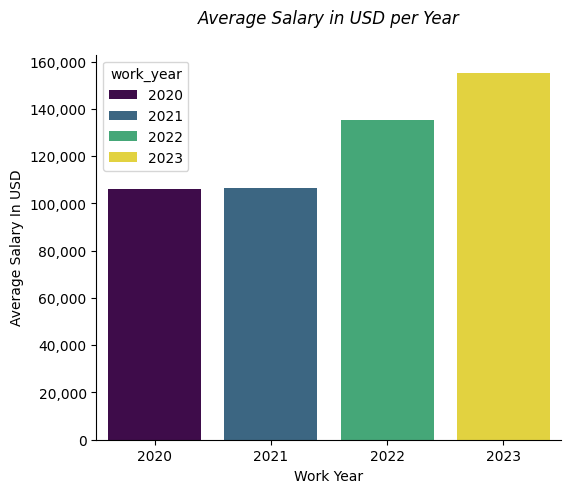

In [113]:
# @title Average Salary per Year

grouped = df.groupby("work_year")

average_salary = grouped['salary_in_usd'].mean()

average_salary = pd.DataFrame(average_salary)

fig = plt.figure(figsize = (6,5))
sns.barplot(x='work_year', y='salary_in_usd', data=average_salary, hue = "work_year", palette='viridis')

sns.despine()

plt.title('Average Salary in USD per Year', y=1.06, fontstyle = 'italic')
plt.xlabel('Work Year')
plt.ylabel('Average Salary In USD')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


In [283]:
# @title Average Salary per Year Plotly Express

grouped = df.groupby("work_year")

average_salary = grouped['salary_in_usd'].mean()

average_salary = pd.DataFrame(average_salary)

average_salary_reset = average_salary.reset_index()



fig = px.bar(average_salary_reset,
             x='work_year',
             y='salary_in_usd',
             color = "work_year",
             labels={'salary_in_usd': 'Average Salary in USD', 'work_year': 'Work Year'},
             title='<i>Average Salary in USD per Year<i>')

fig.add_trace(go.Scatter(x=average_salary_reset['work_year'], y=average_salary_reset['salary_in_usd'],
                         mode='lines+markers',
                         name='Trend',
                         line=dict(color='red')))


fig.update_xaxes(dtick=1)
fig.update_layout(showlegend=False, width=800, height=500)



In [5]:
df['job_title'].value_counts().tail(50)


Financial Data Analyst                  4
Cloud Data Engineer                     4
Business Intelligence Specialist        4
Applied Machine Learning Engineer       3
Software Data Engineer                  3
Finance Data Analyst                    3
Lead Machine Learning Engineer          3
Data Quality Engineer                   3
Lead Data Analyst                       3
Principal Data Engineer                 3
Principal Machine Learning Engineer     3
Data Analytics Lead                     3
Staff Data Analyst                      3
Big Data Architect                      2
ETL Engineer                            2
Autonomous Vehicle Technician           2
Data Visualization Analyst              2
Data Analytics Consultant               2
Data Scientist Lead                     2
Marketing Data Analyst                  2
Data Analytics Specialist               2
Data DevOps Engineer                    2
Principal Data Analyst                  2
Machine Learning Specialist       

Text(0.5, 0, 'Count')

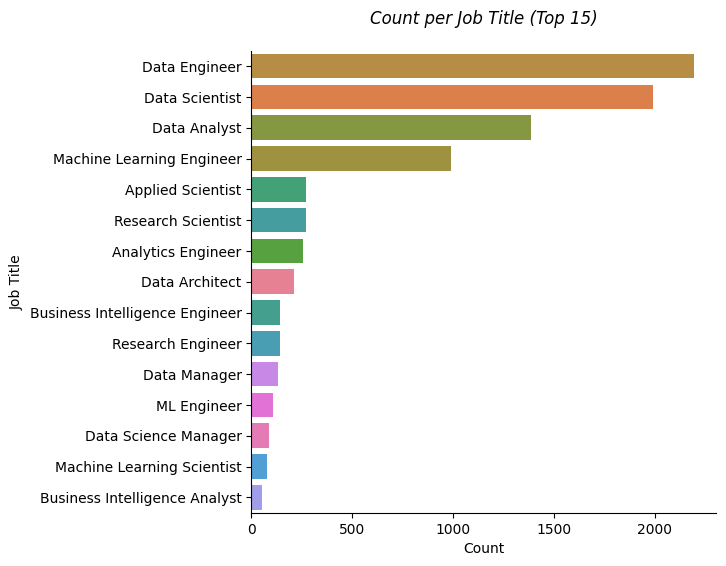

In [228]:
# @title Job Title Count: Top 15

#df['job_title'].value_counts()

counts = df['job_title'].value_counts()

top_15 = counts.head(15).index

top_15_df_jt = df[df['job_title'].isin(top_15)]

category_order = df['job_title'].value_counts().head(15).index

fig = plt.figure(figsize = (6,6))
g = sns.countplot(y = 'job_title', data = top_15_df_jt , hue = 'job_title', order = category_order)

sns.despine()

plt.title('Count per Job Title (Top 15)', y = 1.04, fontstyle = 'italic')
plt.ylabel('Job Title')
plt.xlabel('Count')



In [271]:
# @title Job Title Count: Top 15 (PX)

top_15_counts = df['job_title'].value_counts().head(15).reset_index()
top_15_counts.columns = ['job_title', 'count']

fig = px.bar(top_15_counts,
             y='job_title',
             x='count',
             color='job_title',
             labels={'count': 'Count', 'job_title': 'Job Title'},
             title='<i>Count per Job Title (Top 15)<i>',
             orientation='h')


fig.update_layout(showlegend=False, width=800, height=600)

fig.show()

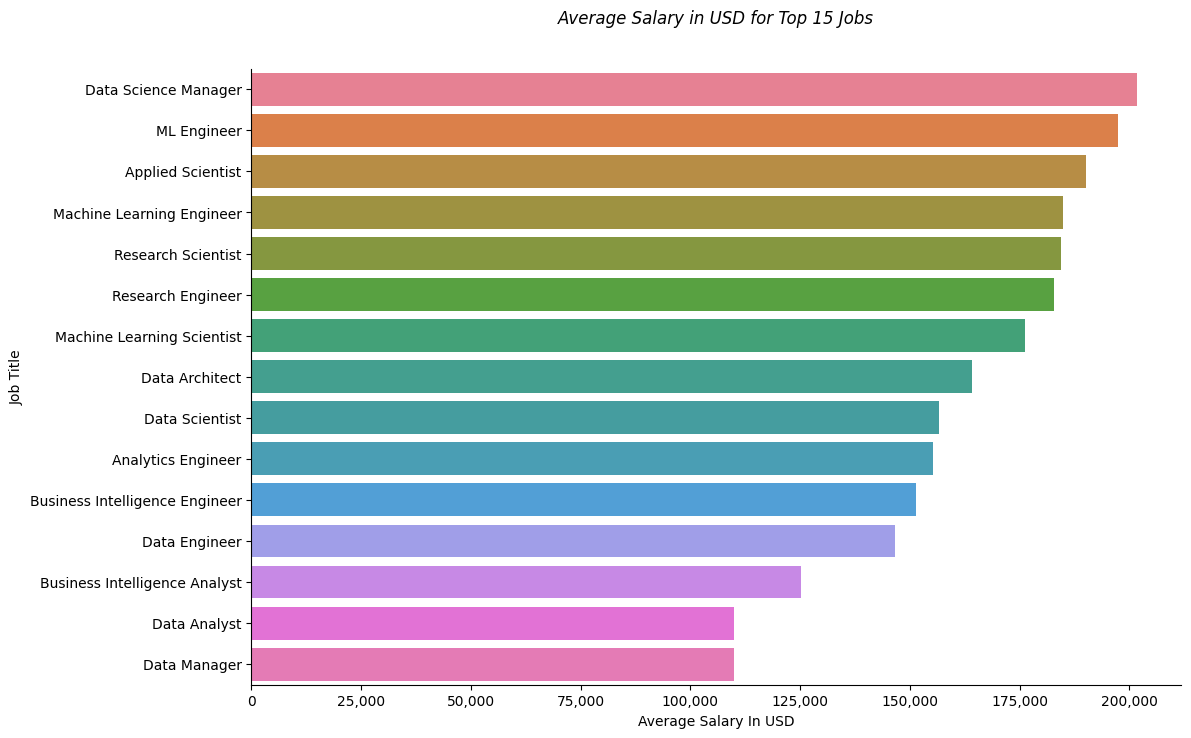

In [158]:
# @title Average Salary for Top Common 15 Jobs

#df['job_title'].value_counts()

counts = df['job_title'].value_counts()

top_15 = counts.head(15).index

top_15_df_jt = df[df['job_title'].isin(top_15)]

grouped = top_15_df_jt.groupby("job_title")

average_per_jt = grouped['salary_in_usd'].mean()

average_per_jt = pd.DataFrame(average_per_jt)

average_reset = average_per_jt.reset_index()

average_sorted = average_reset.sort_values(by='salary_in_usd', ascending=False)

fig = plt.figure(figsize = (12,8))
sns.barplot(y='job_title', x='salary_in_usd', data=average_sorted, hue = "job_title", orient = "h")

sns.despine()

plt.title('Average Salary in USD for Top 15 Jobs', y=1.06, fontstyle = 'italic')
plt.ylabel('Job Title')
plt.xlabel('Average Salary In USD')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


In [224]:
# @title Average Salary for Top Common 15 Jobs Plotly Express

top_15 = df['job_title'].value_counts().head(15).index

top_15_df_jt = df[df['job_title'].isin(top_15)]

grouped = top_15_df_jt.groupby("job_title")

average_per_jt = grouped['salary_in_usd'].mean()

average_per_jt = pd.DataFrame(average_per_jt)

average_reset = average_per_jt.reset_index()

average_sorted = average_reset.sort_values(by='salary_in_usd', ascending=False)

fig = px.bar(average_sorted,
             y='job_title',
             x='salary_in_usd',
             color = "job_title",
             labels={'salary_in_usd': 'Average Salary in USD', 'job_title': 'Job Title'},
             title='<i>Average Salary in USD for Top Most Common 15 Jobs<i>')

fig.update_layout(showlegend=False, width=1100, height=650)

fig.show()

In [223]:
# @title Salaries for Top 10 Paying Jobs Plotly Express

top_salaries = df.sort_values(by='salary_in_usd', ascending=False).head(10)

top_salaries['unique_title'] = top_salaries['job_title'] + ' (' + top_salaries['experience_level'] + ')'

fig = px.bar(top_salaries,
             y='unique_key',
             x='salary_in_usd',
             color="job_title",
             text = "company_location",
             labels={'salary_in_usd': 'Salary in USD', 'unique_key': 'Job Title'},
             title='<i>Top 10 Salaries in Data Science: A Comparison by Job Title, Experience Level, and Company Location<i>')

fig.update_layout(showlegend=False, width=1100, height=650)

fig.show()

In [222]:
# @title Salaries for Bottom 10 Paying Jobs Plotly Express

top_salaries = df.sort_values(by='salary_in_usd', ascending=True).head(10)

top_salaries['unique_title'] = top_salaries['job_title'] + ' (' + top_salaries['experience_level'] + ')'

fig = px.bar(top_salaries,
             y='unique_key',
             x='salary_in_usd',
             color="job_title",
             text = "company_location",
             labels={'salary_in_usd': 'Salary in USD', 'unique_key': 'Job Title'},
             title='<i>Bottom 10 Salaries by Job Title and Experience Level<i>')

fig.update_layout(showlegend=False, width=1100, height=650)

fig.show()

Text(0.5, 0, 'Count')

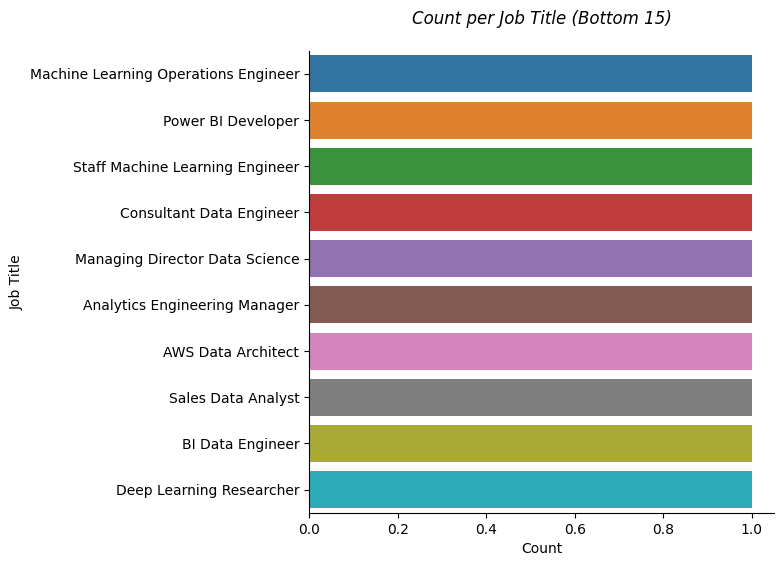

In [77]:
# @title Job Title Count Bottom 15

#df['job_title'].value_counts()

counts = df['job_title'].value_counts()

bottom_15 = counts.tail(10).index

top_15_df_jt_2 = df[df['job_title'].isin(bottom_15)]

fig = plt.figure(figsize = (6,6))
g = sns.countplot(y = 'job_title', data = top_15_df_jt_2 , hue = 'job_title')

sns.despine()

plt.title('Count per Job Title (Bottom 15)', y = 1.04, fontstyle = 'italic')
plt.ylabel('Job Title')
plt.xlabel('Count')


Text(0.5, 0, 'Count')

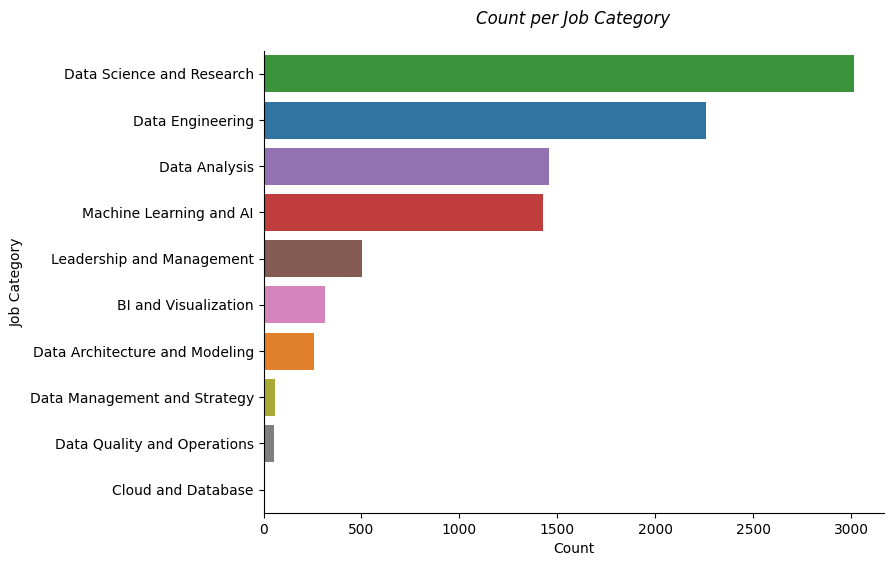

In [270]:
# @title Job Category Count


#df['job_category'].value_counts()

category_order = df['job_category'].value_counts().index

fig = plt.figure(figsize = (8,6))
g = sns.countplot(y = 'job_category', data = df, hue = 'job_category', order=category_order)

sns.despine()

plt.title('Count per Job Category', y = 1.04, fontstyle = 'italic')
plt.ylabel('Job Category')
plt.xlabel('Count')

In [272]:
# @title Job Category Count (PX)

category_counts = df['job_category'].value_counts().reset_index()
category_counts.columns = ['job_category', 'count']

fig = px.bar(category_counts,
             y='job_category',
             x='count',
             color='job_category',
             orientation='h',
             labels={'count': 'Count', 'job_category': 'Job Category'},
             title="<i>Count per Job Category</i>")

fig.update_layout(showlegend=False, width=800, height=600)

fig.show()

In [219]:
# @title Average Salary by Job Category

grouped = df.groupby("job_category")

average_salary = grouped['salary_in_usd'].mean()

average_salary = pd.DataFrame(average_salary)

average_reset = average_salary.reset_index()

average_sorted = average_reset.sort_values(by='salary_in_usd', ascending=False)

fig = px.bar(average_sorted,
             y='job_category',
             x='salary_in_usd',
             color = "job_category",
             labels={'salary_in_usd': 'Average Salary in USD', 'job_category': 'Job Category'},
             title='<i>Average Salary in USD per Job Category<i>')


fig.update_layout(showlegend=False, width=1100, height=600)

In [241]:
# @title Experience Level Count


exp_count = df['experience_level'].value_counts().reset_index()
exp_count.columns = ['experience_level', 'count']


fig = px.pie(exp_count,
             values ='count',
             names ='experience_level',
             title="<i>Pie Chart Showing the Experience Level Distribution of the Data</i>")


fig.update_layout(width=800, height=600)


In [218]:
# @title Average Salary per Experience Level

grouped = df.groupby('experience_level')

average = grouped['salary_in_usd'].mean()

average_by_el = pd.DataFrame(average)

average_reset = average_by_el.reset_index()

average_sorted = average_reset.sort_values(by="salary_in_usd", ascending = False)

fig = px.bar(average_sorted,
             x='experience_level',
             y='salary_in_usd',
             color = 'experience_level',
             labels={'salary_in_usd': 'Average Salary in USD', 'experience_level': 'Experience Level'},
             title="<i>Average Salary per Experience Level across all Data Science Jobs<i>")


fig.update_layout(showlegend=False, width=1100, height=600)

# Pattern is as expected.

In [243]:
# @title Employment Type Count

emp_count = df['employment_type'].value_counts().reset_index()
emp_count.columns = ['employment', 'count']


fig = px.pie(emp_count,
             values ='count',
             names ='employment',
             title="<i>Pie Chart Showing the Employment Type Distribution of the Data</i>")


fig.update_layout(width=800, height=600)

In [55]:
df['employment_type'].value_counts()

Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: employment_type, dtype: int64

Text(0.5, 0, 'Count')

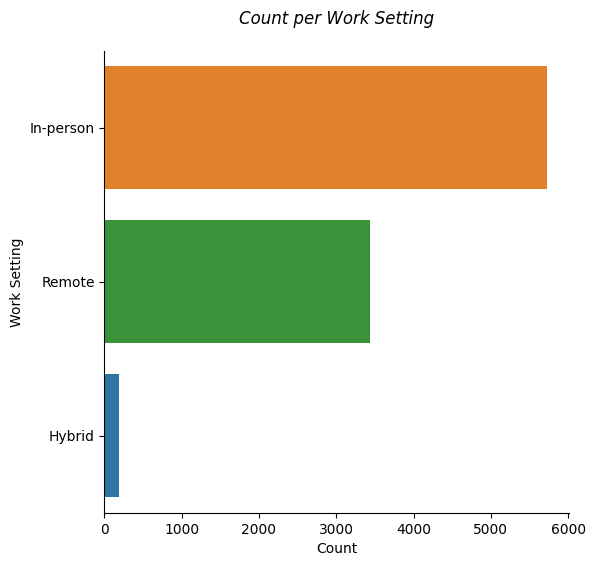

In [233]:
# @title Work Setting Count


#df['work_setting'].value_counts()

category_order = df['work_setting'].value_counts().index

fig = plt.figure(figsize = (6,6))
g = sns.countplot(y = 'work_setting', data = df, hue = 'work_setting', order = category_order)

sns.despine()

plt.title('Count per Work Setting', y = 1.04, fontstyle = 'italic')
plt.ylabel('Work Setting')
plt.xlabel('Count')

In [252]:
df['company_location'].value_counts()

United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: company_location, Length: 70, dtype: int64

Text(0.5, 0, 'Count')

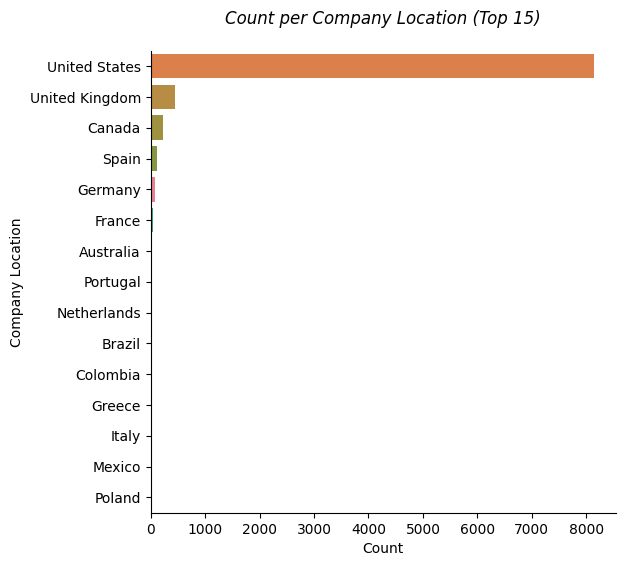

In [232]:
# @title Company Location Count


#df['company_location'].value_counts()

counts = df['company_location'].value_counts()

top_15 = counts.head(15).index

top_15_df = df[df['company_location'].isin(top_15)]

category_order = df['company_location'].value_counts().head(15).index

fig = plt.figure(figsize = (6,6))
g = sns.countplot(y = 'company_location', data = top_15_df, hue = 'company_location', order = category_order)

sns.despine()

plt.title('Count per Company Location (Top 15)', y = 1.04, fontstyle = 'italic')
plt.ylabel('Company Location')
plt.xlabel('Count')

In [220]:
# @title "Average Salary in the Top 15 Most Represented Countries by Company Location"

top_15 = df['company_location'].value_counts().head(15).index

top_15_df_cl = df[df['company_location'].isin(top_15)]

grouped = top_15_df_cl.groupby('company_location')

average = grouped['salary_in_usd'].mean()

average_by_cl = pd.DataFrame(average)

average_reset = average_by_cl.reset_index()

average_sorted = average_reset.sort_values(by="salary_in_usd", ascending = False)

fig = px.bar(average_sorted,
             y='company_location',
             x='salary_in_usd',
             color = "company_location",
             labels={'salary_in_usd': 'Average Salary in USD', 'company_location': 'Company Location'},
             title="<i>Average Salary in the Top 15 Most Represented Countries by Company Location<i>")


fig.update_layout(showlegend=False, width=1100, height=600)

In [301]:
# @title "Average Salary in the Least 15 Represented Countries by Company Location"

bottom_15 = df['company_location'].value_counts().tail(15).index

bottom_15_df_cl = df[df['company_location'].isin(bottom_15)]

grouped = bottom_15_df_cl.groupby(['company_location', 'job_category'])

average = grouped['salary_in_usd'].mean()

average_by_cl = pd.DataFrame(average)

average_reset = average_by_cl.reset_index()

average_sorted = average_reset.sort_values(by="salary_in_usd", ascending = False)

fig = px.bar(average_sorted,
             y='company_location',
             x='salary_in_usd',
             color = "company_location",
             text = "job_category",
             labels={'salary_in_usd': 'Average Salary in USD', 'company_location': 'Company Location'},
             title="<i>Average Salary in the Least 15 Represented Countries by Company Location and Job Category<i>")


fig.update_layout(showlegend=False, width=1100, height=600)

In [300]:
# @title "Average Salary in USD based on Currency"

#top_15 = df['company_location'].value_counts().head(15).index

#top_15_df_cl = df[df['company_location'].isin(top_15)]

grouped = df.groupby('salary_currency')

average = grouped['salary_in_usd'].mean()

average_by_curr = pd.DataFrame(average)

average_reset = average_by_curr.reset_index()

average_sorted = average_reset.sort_values(by="salary_in_usd", ascending = False)

fig = px.bar(average_sorted,
             x='salary_currency',
             y='salary_in_usd',
             color = "salary_currency",
             labels={'salary_in_usd': 'Average Salary in USD', 'salary_currency': 'Salary Currency'},
             title="<i>Average Salary in USD based on Currency of Salary<i>")


fig.update_layout(showlegend=False, width=1100, height=600)

Text(0.5, 0, 'Count')

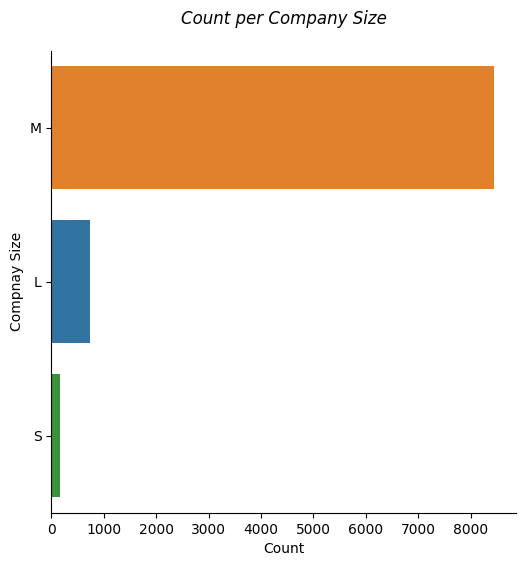

In [246]:
# @title Company Size Count

#df['company_size'].value_counts()

category_order = df['company_size'].value_counts().index

fig = plt.figure(figsize = (6,6))
g = sns.countplot(y = 'company_size', data = df, hue = 'company_size', order = category_order)

sns.despine()

plt.title('Count per Company Size', y = 1.04, fontstyle = 'italic')
plt.ylabel('Compnay Size')
plt.xlabel('Count')

In [262]:
# @title Sunburst 1
fig = px.sunburst(df,
                  path=['work_year', 'employment_type', 'job_category'],
                  values='salary_in_usd',
                  title = "<i>Salary Distribution Across Years, Employment Types, and Job Categories<i>")

fig.update_layout(width = 1000, height = 800)
fig.show()

In [264]:
# @title Sunburst 2
fig = px.sunburst(df,
                  path=['experience_level', 'work_setting', 'job_category'],
                  values='salary_in_usd',
                  title = "<i>Salary Distribution Across Experience Level, Work Setting, and Job Categories<i>")

fig.update_layout(width = 1000, height = 800)
fig.show()

In [266]:
# @title Sunburst 3

top_15 = df['company_location'].value_counts().head(15).index

top_15_cl = df[df['company_location'].isin(top_15)]

fig = px.sunburst(top_15_cl,
                  path=['company_size', 'experience_level', 'company_location'],
                  values='salary_in_usd',
                  title = "<i>Salary Distribution Across Company Size, Job Category, and Company Location (top 15 locations)<i>")

fig.update_layout(width = 1000, height = 800)
fig.show()

In [304]:
# @title Sunburst 4
avg_salary_df = df.groupby(['company_size', 'work_setting', 'employment_type'])['salary_in_usd'].mean().reset_index()

fig = px.sunburst(
    avg_salary_df,
    path=['company_size', 'work_setting', 'employment_type'],
    values='salary_in_usd',
    title="<i>Average Salary Distribution Across Company Size, Work Setting, and Employment Type</i>"
)

fig.update_layout(width=1000, height=800)

fig.show()

In [307]:
fig = px.sunburst(df,
                  path=['company_size', 'work_setting', 'employment_type'],
                  values='salary_in_usd',
                  title = "<i>Salary Distribution Across Company Size, Work Setting, and Employment Type<i>")

fig.update_layout(width = 1000, height = 700)
fig.show()

Text(0, 0.5, 'Count')

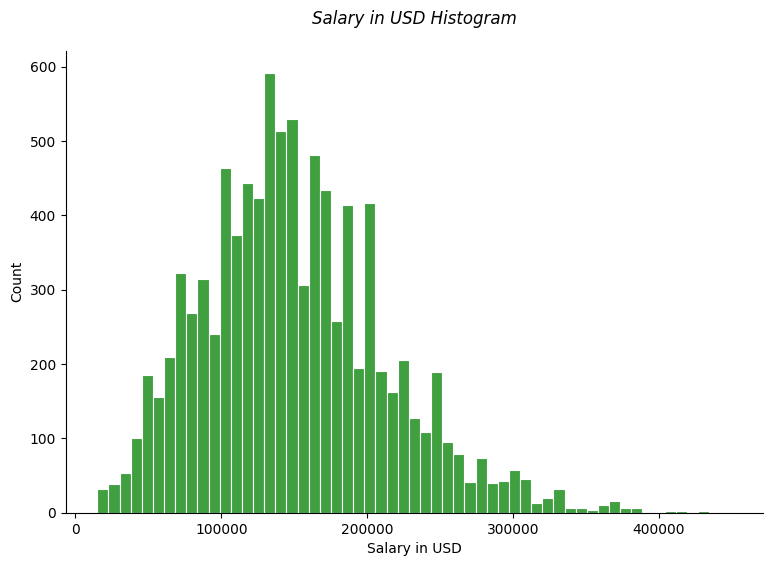

In [179]:
# @title salary In USD Histogram

fig = plt.figure(figsize = (9,6))
g = sns.histplot(x = 'salary_in_usd', data = df, color = 'green', edgecolor = 'white')

sns.despine()

plt.title('Salary in USD Histogram', y = 1.04, fontstyle = 'italic')
plt.xlabel('Salary in USD')
plt.ylabel('Count')

Text(0.5, 1.04, 'Box Plot showing the Distribution of the Numeric Data')

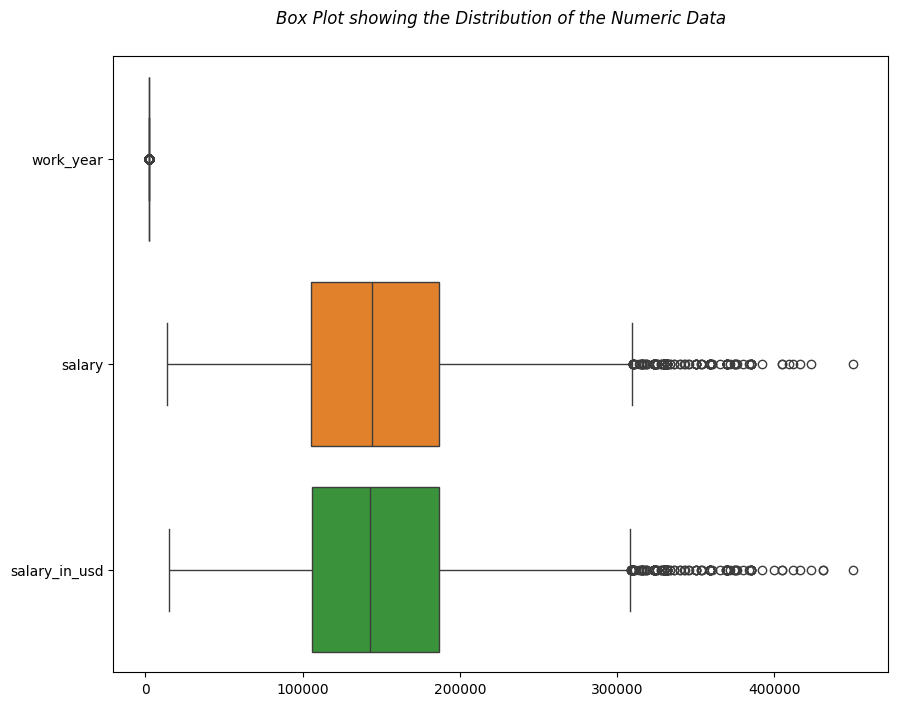

In [251]:
# To check for the distribution in the numerical data.

fig = plt.figure(figsize = (10,8))
g = sns.boxplot(data = df, orient = 'h')

plt.title('Box Plot showing the Distribution of the Numeric Data', y = 1.04, fontstyle = 'italic')

In [9]:
# To check for statistical summary of the numeric data.

df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000
